In [1]:
pip install decorator==5.0.9

Note: you may need to restart the kernel to use updated packages.


In [706]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [707]:
github_df = pd.read_csv('datasets/github/github.csv', index_col = 0)
github_df.head()

,Title,Description,Created at,Stars,Pull,Issues,Commit,Branches,Forks,Contributors,Tag,License,Link,Repo_match,Address
0,FreeCodeCamp,The https://www.freeCodeCamp.org open source ...,Dec 2014,304238,789,189,24132,4,22380,3765,"['learn-to-code', 'nonprofits', 'programming',...",BSD-3-Clause,https://github.com/FreeCodeCamp/FreeCodeCamp,FreeCodeCamp,FreeCodeCamp/FreeCodeCamp
1,bootstrap,"The most popular HTML, CSS, and JavaScript fr...",Jul 2011,135131,59,299,18928,52,66516,1085,"['css', 'bootstrap', 'javascript', 'html', 'sc...",MIT,https://github.com/twbs/bootstrap,twbsbootstrap,twbs/bootstrap
2,programming-books,📚 Freely available programming books,Oct 2013,126737,10,31,5045,11,31613,1066,"['education', 'books', 'list', 'resource']",View license,https://github.com/vhf/free-programming-books,vhffree_programming_books,vhf/free-programming-books
3,d3,"Bring data to life with SVG, Canvas and HTML....",Sep 2010,86543,0,4,4181,24,21135,121,['visualization'],BSD-3-Clause,https://github.com/d3/d3,d3,d3/d3
4,angular.js,AngularJS - HTML enhanced for web apps!,Jan 2010,59605,77,385,8967,16,28888,1591,[],MIT,https://github.com/angular/angular.js,angularangular_js,angular/angular.js


In [708]:
github_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7660 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         7659 non-null   object
 1   Description   7660 non-null   object
 2   Created at    7660 non-null   object
 3   Stars         7660 non-null   int64 
 4   Pull          7660 non-null   int64 
 5   Issues        7660 non-null   object
 6   Commit        7660 non-null   object
 7   Branches      7660 non-null   object
 8   Forks         7660 non-null   int64 
 9   Contributors  2003 non-null   object
 10  Tag           7660 non-null   object
 11  License       7660 non-null   object
 12  Link          7660 non-null   object
 13  Repo_match    7660 non-null   object
 14  Address       7660 non-null   object
dtypes: int64(3), object(12)
memory usage: 957.5+ KB


In [709]:
github_df['Contributors'].isnull().sum()

5657

In [710]:
github_df['Created at'].max()

'Sep 2016'

In [711]:
github_df['Created at'].min()

'Apr 2008'

In [712]:
github_df['Created at'].unique()


array(['Dec 2014', 'Jul 2011', 'Oct 2013', 'Sep 2010', 'Jan 2010',
       'May 2013', 'Feb 2012', 'Aug 2009', 'Nov 2012', 'Nov 2010',
       'Apr 2009', 'Sep 2011', 'May 2009', 'Oct 2011', 'Jan 2013',
       'Jan 2012', 'Oct 2015', 'Apr 2008', 'Jul 2013', 'Dec 2011',
       'Feb 2011', 'Mar 2010', 'Jun 2009', 'Nov 2014', 'Oct 2008',
       'Jun 2011', 'Mar 2013', 'Jun 2014', 'Dec 2010', 'Nov 2015',
       'May 2015', 'May 2011', 'Apr 2010', 'Sep 2014', 'Aug 2014',
       'Oct 2010', 'Jul 2014', 'Mar 2009', 'Jun 2013', 'Apr 2014',
       'Apr 2011', 'Mar 2012', 'Jan 2014', 'Jun 2010', 'Oct 2009',
       'Sep 2009', 'Feb 2010', 'Sep 2015', 'Dec 2013', 'Nov 2013',
       'Apr 2016', 'May 2014', 'Mar 2014', 'Aug 2012', 'Feb 2014',
       'Apr 2013', 'Jan 2016', 'Jul 2008', 'Jul 2012', 'Apr 2012',
       'Sep 2012', 'Aug 2010', 'Apr 2015', 'May 2010', 'Mar 2015',
       'Dec 2009', 'Feb 2013', 'Sep 2013', 'Aug 2011', 'Jan 2015',
       'Oct 2012', 'Jan 2011', 'Aug 2013', 'Jul 2016', 'Aug 20

In [713]:
github_df.rename(columns={'Created at': 'Created_at'}, inplace = True)

In [714]:
# github_df['Created_at'] = pd.to_datetime(github_df['Created_at'])


In [715]:
github_df.dtypes

Title           object
Description     object
Created_at      object
Stars            int64
Pull             int64
Issues          object
Commit          object
Branches        object
Forks            int64
Contributors    object
Tag             object
License         object
Link            object
Repo_match      object
Address         object
dtype: object

In [716]:
github_df.columns

Index(['Title', 'Description', 'Created_at', 'Stars', 'Pull', 'Issues',
       'Commit', 'Branches', 'Forks', 'Contributors', 'Tag', 'License', 'Link',
       'Repo_match', 'Address'],
      dtype='object')

In [717]:
github_occ = github_df[['Title','Created_at']]
github_occ.head()

,Title,Created_at
0,FreeCodeCamp,Dec 2014
1,bootstrap,Jul 2011
2,programming-books,Oct 2013
3,d3,Sep 2010
4,angular.js,Jan 2010


In [718]:
counts = github_occ['Created_at'].value_counts()
df_counts = pd.DataFrame(data=counts)
df_counts.reset_index(inplace=True)
df_counts.rename(columns={'index':'years','Created_at': 'counts'}, inplace = True)
# df_counts['years'] = df_counts.index
df_counts.head()


,years,counts
0,Mar 2015,147
1,Jul 2014,144
2,Jun 2014,140
3,Jan 2014,129
4,Jul 2013,129


In [719]:
value_2008 = github_occ[github_occ['Created_at'].str.contains("2008")].value_counts().sum()
value_2009 = github_occ[github_occ['Created_at'].str.contains("2009")].value_counts().sum()
value_2010 = github_occ[github_occ['Created_at'].str.contains("2010")].value_counts().sum()
value_2011 = github_occ[github_occ['Created_at'].str.contains("2011")].value_counts().sum()
value_2012 = github_occ[github_occ['Created_at'].str.contains("2012")].value_counts().sum()
value_2013 = github_occ[github_occ['Created_at'].str.contains("2013")].value_counts().sum()
value_2014 = github_occ[github_occ['Created_at'].str.contains("2014")].value_counts().sum()
value_2015 = github_occ[github_occ['Created_at'].str.contains("2015")].value_counts().sum()
value_2016 = github_occ[github_occ['Created_at'].str.contains("2016")].value_counts().sum()
dataa = [['2008', value_2008], ['2009', value_2009], ['2010', value_2010], ['2011', value_2011], ['2012', value_2012], ['2013', value_2013], ['2014', value_2014], ['2015', value_2015], ['2016', value_2016]]
 
# Create the pandas DataFrame
repo_count = pd.DataFrame(dataa, columns = ['Year', 'Repositories_count'])
repo_count.head(10)


,Year,Repositories_count
0,2008,151
1,2009,309
2,2010,559
3,2011,915
4,2012,1119
5,2013,1368
6,2014,1416
7,2015,1281
8,2016,540


<AxesSubplot:xlabel='Year', ylabel='Repositories_count'>

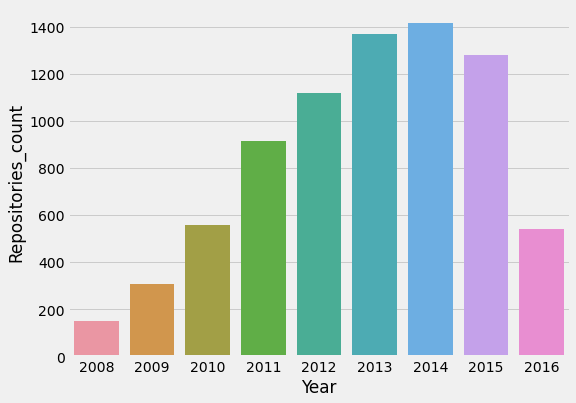

In [721]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="Year",y="Repositories_count", data=repo_count,
            label="Number of Repositories Created per Month")
# ax.set(xlabel="Num of repositories per year", ylabel = "count",yscale="log")


,Title,Created_at
18,docker,Apr 2008
29,legacy-homebrew,Oct 2008
117,polymer,Jul 2008
203,PhotoSwipe,Dec 2008
208,Flat-UI,Jun 2008
...,...,...
7468,rhodes,Sep 2008
7482,curb,Jul 2008
7546,email-spec,Dec 2008
7564,fakeweb,Oct 2008


In [705]:
df_top10 = github_df.nlargest(10, 'Stars')
df_top10.head(10)

,Title,Description,Created at,Stars,Pull,Issues,Commit,Branches,Forks,Contributors,Tag,License,Link,Repo_match,Address
0,FreeCodeCamp,The https://www.freeCodeCamp.org open source ...,Dec 2014,304238,789,189,24132,4,22380,3765,"['learn-to-code', 'nonprofits', 'programming',...",BSD-3-Clause,https://github.com/FreeCodeCamp/FreeCodeCamp,FreeCodeCamp,FreeCodeCamp/FreeCodeCamp
26,vue,"🖖 Vue.js is a progressive, incrementally-adop...",Mar 2010,145768,104,229,3033,34,21273,278,"['vue', 'javascript', 'frontend', 'framework']",MIT,https://github.com/vuejs/vue,vuejsvue,vuejs/vue
1,bootstrap,"The most popular HTML, CSS, and JavaScript fr...",Jul 2011,135131,59,299,18928,52,66516,1085,"['css', 'bootstrap', 'javascript', 'html', 'sc...",MIT,https://github.com/twbs/bootstrap,twbsbootstrap,twbs/bootstrap
5,react,"A declarative, efficient, and flexible JavaSc...",May 2013,134184,194,619,11204,29,25004,1304,"['javascript', 'react', 'frontend', 'declarati...",MIT,https://github.com/facebook/react,facebookreact,facebook/react
22,tensorflow,An Open Source Machine Learning Framework for...,Jan 2012,132397,259,2378,62395,32,76663,2128,"['tensorflow', 'machine-learning', 'python', '...",Apache-2.0,https://github.com/tensorflow/tensorflow,tensorflow,tensorflow/tensorflow
2,programming-books,📚 Freely available programming books,Oct 2013,126737,10,31,5045,11,31613,1066,"['education', 'books', 'list', 'resource']",View license,https://github.com/vhf/free-programming-books,vhffree_programming_books,vhf/free-programming-books
7,awesome,😎 Awesome lists about all kinds of interestin...,Aug 2009,113786,13,12,846,2,15061,400,"['awesome', 'awesome-list', 'unicorns', 'lists...",-,https://github.com/sindresorhus/awesome,sindresorhusawesome,sindresorhus/awesome
9,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitte...,Nov 2010,106386,109,156,1487,2,21162,159,"['book-series', 'javascript', 'closures', 'pro...",View license,https://github.com/getify/You-Dont-Know-JS,getifyYou_Dont_Know_JS,getify/You-Dont-Know-JS
8,oh-my-zsh,"🙃 A delightful community-driven (with 1,300+ ...",Nov 2012,93267,547,169,5198,1,17266,1378,"['shell', 'zsh-configuration', 'theme', 'termi...",View license,https://github.com/robbyrussell/oh-my-zsh,robbyrusselloh_my_zsh,robbyrussell/oh-my-zsh
10,javascript,JavaScript Style Guide,Apr 2009,87931,27,74,1768,3,16904,422,"['javascript', 'eslint', 'naming-conventions',...",MIT,https://github.com/airbnb/javascript,airbnbjavascript,airbnb/javascript


In [328]:
# df_top10['Stars'] = np.log(df_top10['Stars'].values.reshape(-1,1))

# df_top10.head(6)

[Text(0.5, 0, 'Repositories'), Text(0, 0.5, 'Star(Log scale)'), None]

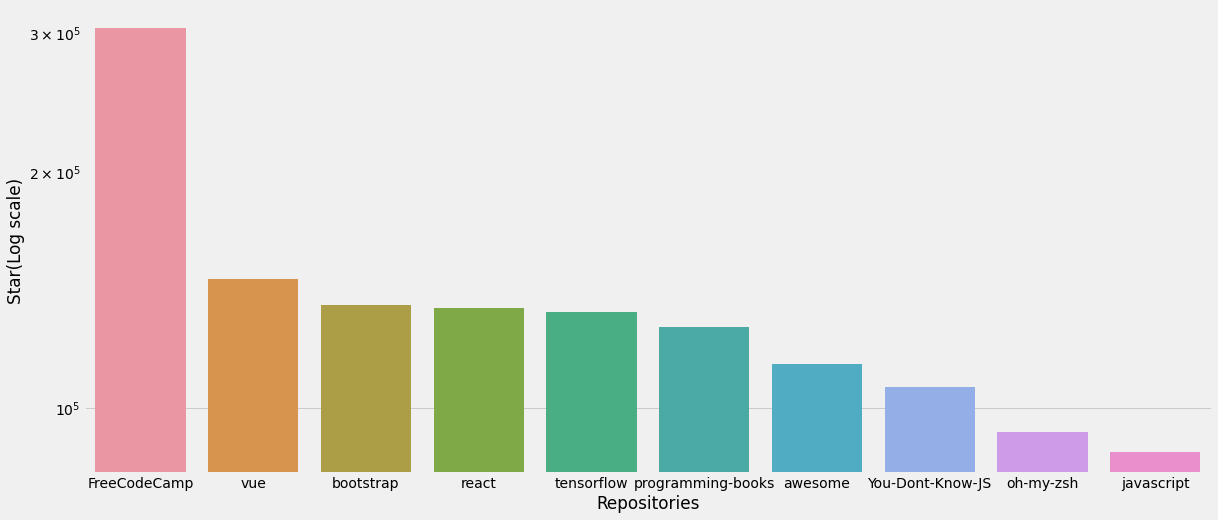

In [722]:
# Top 10 Repository with respect to Stars
f, ax = plt.subplots(figsize=(18, 8))
# sns.barplot(x="Title",y="Stars", data=df_top10,
#             label="Number of Repositories Created per Month", color="b")
ax = sns.barplot(x="Title",y="Stars", data=df_top10,
            label="Number of Repositories Created per Month")
ax.set(xlabel="Repositories", ylabel = "Star(Log scale)",yscale="log")

In [725]:

df_con = github_df.copy()
df_con.drop(df_con.loc[df_con['Contributors']=='∞'].index, inplace=True)
df_con.drop(df_con.loc[df_con['Contributors']=='-'].index, inplace=True)

# df_con[df_con['Contributors'] == '-']

In [726]:


df_con['Contributors'] = df_con['Contributors'].astype(float)
df_con10 = df_con.nlargest(10, 'Contributors')
df_con10.head(5)


,Title,Description,Created_at,Stars,Pull,Issues,Commit,Branches,Forks,Contributors,Tag,License,Link,Repo_match,Address
1560,Specs,The CocoaPods Master Repo,Apr 2009,5304,0,-,409906,7,8230,23422.0,[],-,https://github.com/CocoaPods/Specs,CocoaPodsSpecs,CocoaPods/Specs
372,DefinitelyTyped,The repository for high quality TypeScript ty...,Oct 2014,23619,132,2848,63888,56,18434,9234.0,"['typescript', 'definition', 'dts', 'types', '...",View license,https://github.com/DefinitelyTyped/DefinitelyT...,DefinitelyTyped,DefinitelyTyped/DefinitelyTyped
5198,azure-content,Open source documentation of Microsoft Azure,Dec 2010,2921,157,2023,451381,67,7784,5524.0,[],View license,https://github.com/Azure/azure-content,Azureazure_content,Azure/azure-content
29,legacy-homebrew,💀 The former home of Homebrew/homebrew (depre...,Oct 2008,28048,0,0,63882,1,12503,5437.0,[],-,https://github.com/Homebrew/legacy-homebrew,Homebrewlegacy_homebrew,Homebrew/legacy-homebrew
80,ansible,Ansible is a radically simple IT automation p...,Apr 2016,38789,2034,3993,46333,41,16334,4548.0,"['python', 'ansible']",GPL-3.0,https://github.com/ansible/ansible,ansible,ansible/ansible


In [727]:
# df_con10['Contributors'] = np.log(df_con10['Contributors'].values.reshape(-1,1))

# df_con10.head()

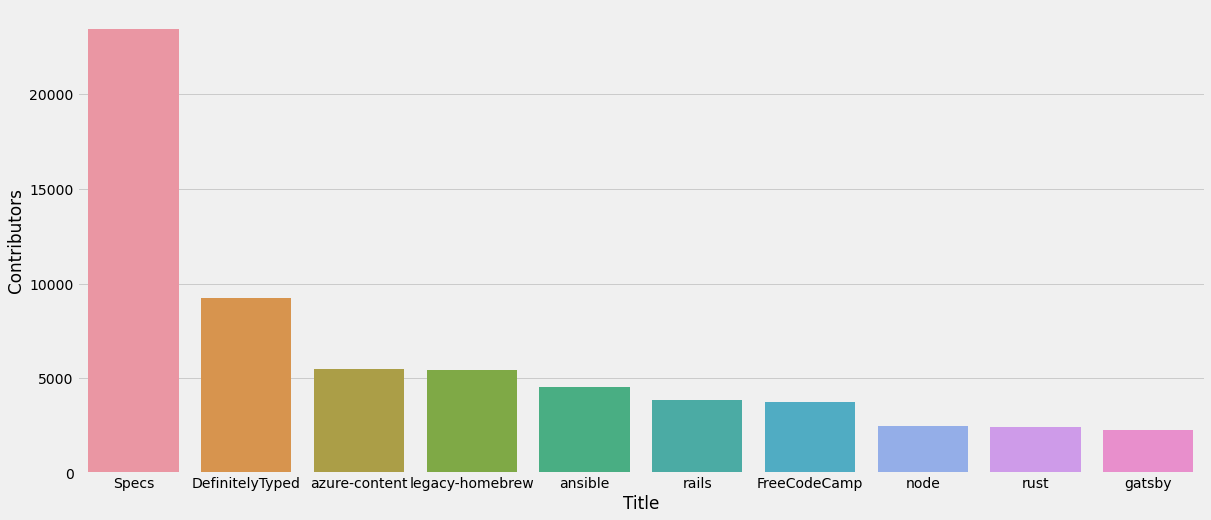

In [736]:
# Top 10 Repository with respect to Contributers
f, ax = plt.subplots(figsize=(18, 8))
ax = sns.barplot(x="Title",y="Contributors", data=df_con10,
            label="Number of Repositories Created per Month")
# ax.set(xlabel="Repositories", ylabel = "Contributors (Log scale)",yscale="log")

In [730]:
df_con['Commit'] = df_con['Commit'].astype(float)
df_com10 = df_con.nlargest(10, 'Commit')
df_com10.head(11)

,Title,Description,Created_at,Stars,Pull,Issues,Commit,Branches,Forks,Contributors,Tag,License,Link,Repo_match,Address
6151,WhatsApp,The official GitHub mirror of the Chromium so...,Jun 2016,4317,0,-,807181.0,7,1783,NaN,[],BSD-3-Clause,https://github.com/Aluxian/WhatsApp-Desktop,AluxianWhatsApp_Desktop,Aluxian/WhatsApp-Desktop
6152,novm,The official GitHub mirror of the Chromium so...,Oct 2013,4317,0,-,807181.0,7,1783,NaN,[],BSD-3-Clause,https://github.com/google/novm,googlenovm,google/novm
5198,azure-content,Open source documentation of Microsoft Azure,Dec 2010,2921,157,2023,451381.0,67,7784,5524.0,[],View license,https://github.com/Azure/azure-content,Azureazure_content,Azure/azure-content
1560,Specs,The CocoaPods Master Repo,Apr 2009,5304,0,-,409906.0,7,8230,23422.0,[],-,https://github.com/CocoaPods/Specs,CocoaPodsSpecs,CocoaPods/Specs
844,frameworks_base,-,Apr 2013,8692,0,-,386441.0,187,5490,NaN,[],View license,https://github.com/android/platform_frameworks...,androidplatform_frameworks_base,android/platform_frameworks_base
1522,intellij,IntelliJ IDEA Community Edition,Feb 2012,8286,121,-,254005.0,251,2929,414.0,"['intellij', 'intellij-platform']",Apache-2.0,https://github.com/JetBrains/intellij-community,JetBrainsintellij_community,JetBrains/intellij-community
3455,webkit,Unofficial mirror of the WebKit SVN repository,Oct 2010,4191,0,-,214374.0,5,1708,0.0,[],-,https://github.com/WebKit/webkit,WebKitwebkit,WebKit/webkit
5472,nixpkgs,Nix Packages collection,Mar 2009,4042,1359,3181,188513.0,68,3882,2211.0,"['nixpkgs', 'nix', 'nixos', 'linux']",MIT,https://github.com/NixOS/nixpkgs,NixOSnixpkgs,NixOS/nixpkgs
7038,server,MariaDB server is a community developed fork ...,Jan 2010,2889,121,-,186404.0,394,879,NaN,[],GPL-2.0,https://github.com/MariaDB/server,MariaDBserver,MariaDB/server
4618,llvm,Mirror of official llvm git repository locate...,Dec 2011,4002,1,-,183377.0,32,1887,682.0,"['llvm', 'virtual-machine', 'intermediate-repr...",Apache-2.0,https://github.com/llvm-mirror/llvm,llvm_mirrorllvm,llvm-mirror/llvm


In [731]:
# df_com10['Commit'] = np.log(df_com10['Commit'].values.reshape(-1,1))

# df_com10.head()

[Text(0.5, 0, 'Repositories'), Text(0, 0.5, 'Commits (Log scale)'), None]

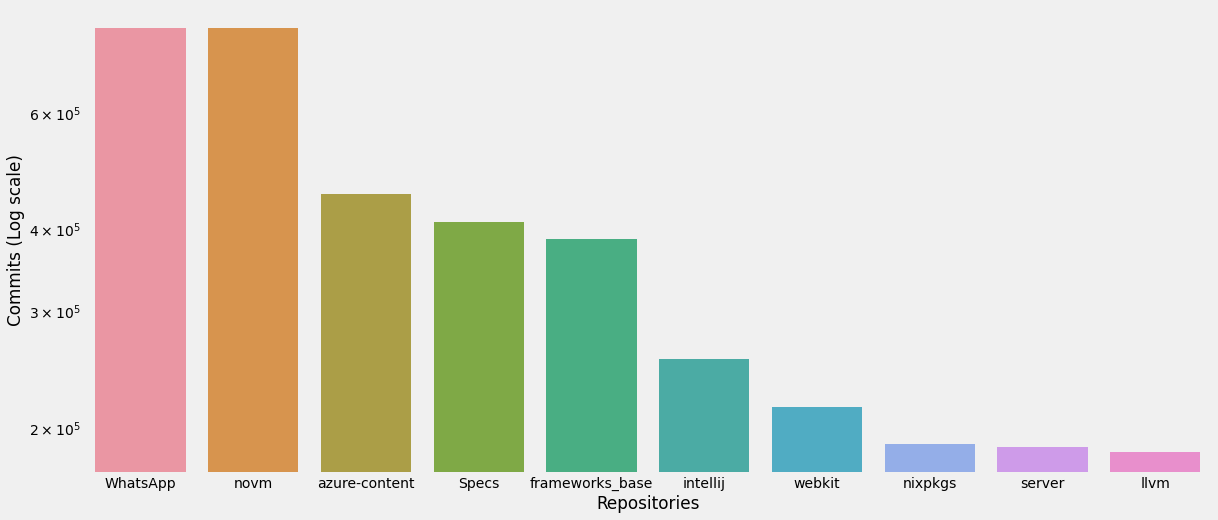

In [732]:
#Top 10 repositories with respect to commit
f, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x="Title",y="Commit", data=df_com10,
            label="Top 10 repositories with respect to commit")
ax.set(xlabel="Repositories", ylabel = "Commits (Log scale)",yscale="log")

In [733]:
df_con['Branches'] = df_con['Branches'].astype(float)
df_ban10 = df_con.nlargest(10, 'Branches')
df_ban10.head(11)

,Title,Description,Created_at,Stars,Pull,Issues,Commit,Branches,Forks,Contributors,Tag,License,Link,Repo_match,Address
1580,v8,The official mirror of the V8 Git repository,Sep 2014,13131,2,-,57641.0,9875.0,2571,332.0,"['javascript-engine', 'virtual-machine', 'comp...",View license,https://github.com/v8/v8,v8,v8/v8
636,kotlin,The Kotlin Programming Language,Feb 2012,28668,102,-,56844.0,2519.0,3336,328.0,"['kotlin', 'programming-language', 'compiler',...",-,https://github.com/JetBrains/kotlin,JetBrainskotlin,JetBrains/kotlin
88,gitlabhq,GitLab CE Mirror | Please open new issues in ...,Nov 2014,21965,8,-,99730.0,2158.0,5581,1960.0,"['ruby', 'gitlab', 'rails']",MIT,https://github.com/gitlabhq/gitlabhq,gitlabhq,gitlabhq/gitlabhq
4761,twisted,Event-driven networking engine written in Pyt...,Mar 2015,3491,93,-,24733.0,1848.0,890,NaN,"['python', 'twisted', 'async', 'async-python',...",View license,https://github.com/twisted/twisted,twisted,twisted/twisted
4928,rstudio,RStudio is an integrated development environm...,Jul 2011,2860,3,1300,26104.0,1713.0,704,NaN,[],View license,https://github.com/rstudio/rstudio,rstudio,rstudio/rstudio
5160,h2o-3,Open Source Fast Scalable Machine Learning Pl...,Sep 2011,4231,99,-,25156.0,1353.0,1553,NaN,"['h2o', 'machine-learning', 'data-science', 'd...",Apache-2.0,https://github.com/h2oai/h2o-3,h2oaih2o_3,h2oai/h2o-3
4376,react-style,ClickHouse is a free analytic DBMS for big da...,May 2013,7848,84,875,27840.0,1161.0,1338,311.0,"['dbms', 'olap', 'analytics', 'sql', 'distribu...",Apache-2.0,https://github.com/js-next/react-style,js_nextreact_style,js-next/react-style
4377,restful-auth,ClickHouse is a free analytic DBMS for big da...,Mar 2013,7848,84,875,27840.0,1161.0,1338,311.0,"['dbms', 'olap', 'analytics', 'sql', 'distribu...",Apache-2.0,https://github.com/technoweenie/restful-authen...,technoweenierestful_authentication,technoweenie/restful-authentication
5569,pachyderm,Reproducible Data Science at Scale!,Jan 2014,3871,35,396,14611.0,1141.0,379,NaN,"['go', 'pachyderm', 'docker', 'analytics', 'bi...",Apache-2.0,https://github.com/pachyderm/pachyderm,pachyderm,pachyderm/pachyderm
564,CNTK,"Microsoft Cognitive Toolkit (CNTK), an open s...",Dec 2013,16312,87,682,16110.0,1053.0,4345,197.0,"['cognitive-toolkit', 'cntk', 'deep-learning',...",View license,https://github.com/Microsoft/CNTK,MicrosoftCNTK,Microsoft/CNTK


<AxesSubplot:xlabel='Title', ylabel='Branches'>

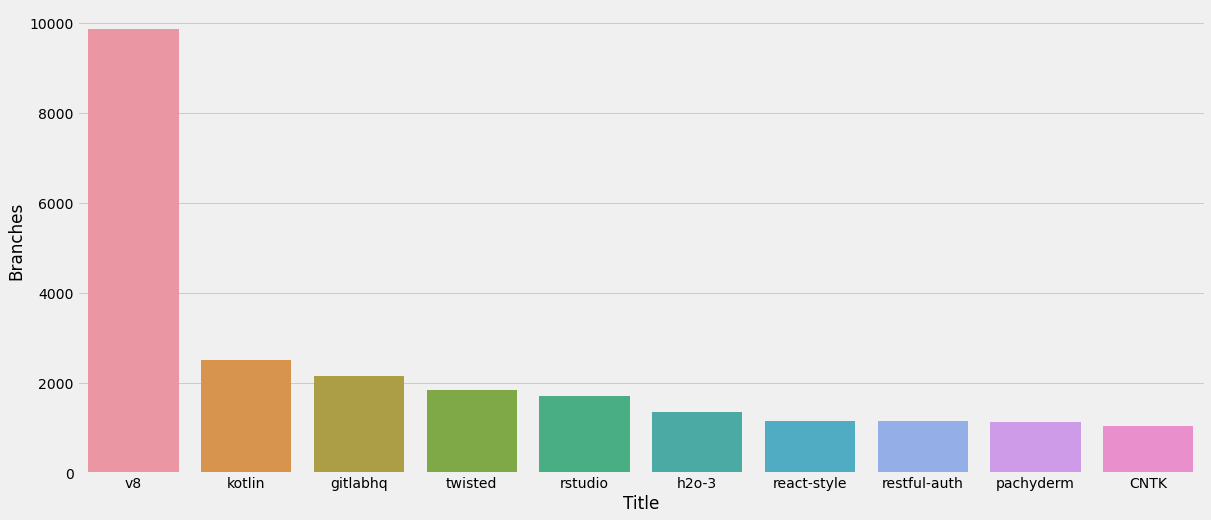

In [735]:
#Top 10 repositories with respect to branches
f, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x="Title",y="Branches", data=df_ban10,
            label="Top 10 repositories with respect to branches")
# ax.set(xlabel="Repositories", ylabel = "Branches (Log scale)",yscale="log")

In [87]:
#Does number of number  of Commits depends on the Contributers

<AxesSubplot:xlabel='counts', ylabel='years'>

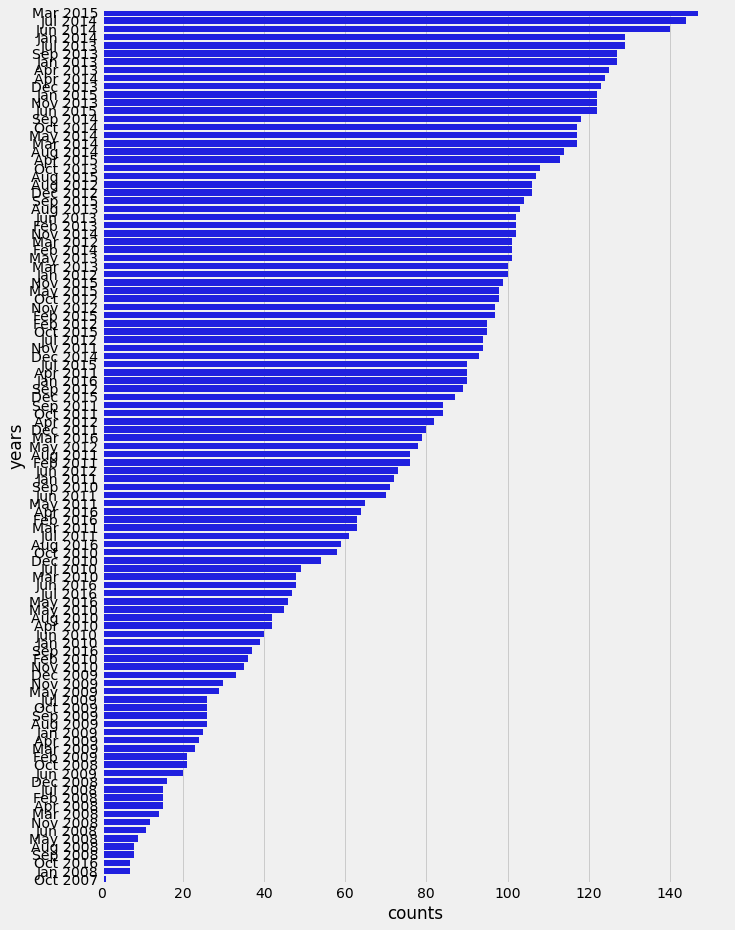

In [88]:
#Number of repositries created with respect to timestamp.This Graph also shows the increase in the fame/popularity of the github
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x="counts",y="years", data=df_counts,
            label="Number of Repositories Created per Month", color="b")



In [89]:
df_con.dtypes

Title            object
Description      object
Created_at       object
Stars             int64
Pull              int64
Issues           object
Commit          float64
Branches        float64
Forks             int64
Contributors    float64
Tag              object
License          object
Link             object
Repo_match       object
Address          object
dtype: object

In [389]:
#correlation matrix
fig = px.scatter_matrix(df_con,
    dimensions=["Stars", "Pull", "Commit", "Branches","Forks","Contributors"])
fig.update_traces(diagonal_visible=False)
fig.update_xaxes(type="log")
fig.update_yaxes(type="log")
fig.show()

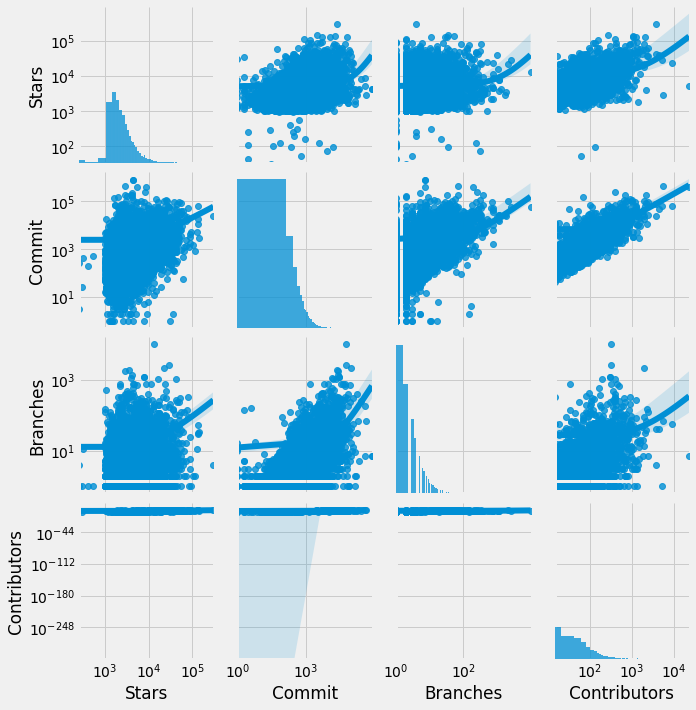

In [391]:
ax=sns.pairplot(df_con,x_vars=["Stars", "Commit", "Branches","Contributors"],
    y_vars=["Stars", "Commit", "Branches","Contributors"],kind="reg")
ax.set(xscale = "log",yscale="log")
plt.show()

[None, None]

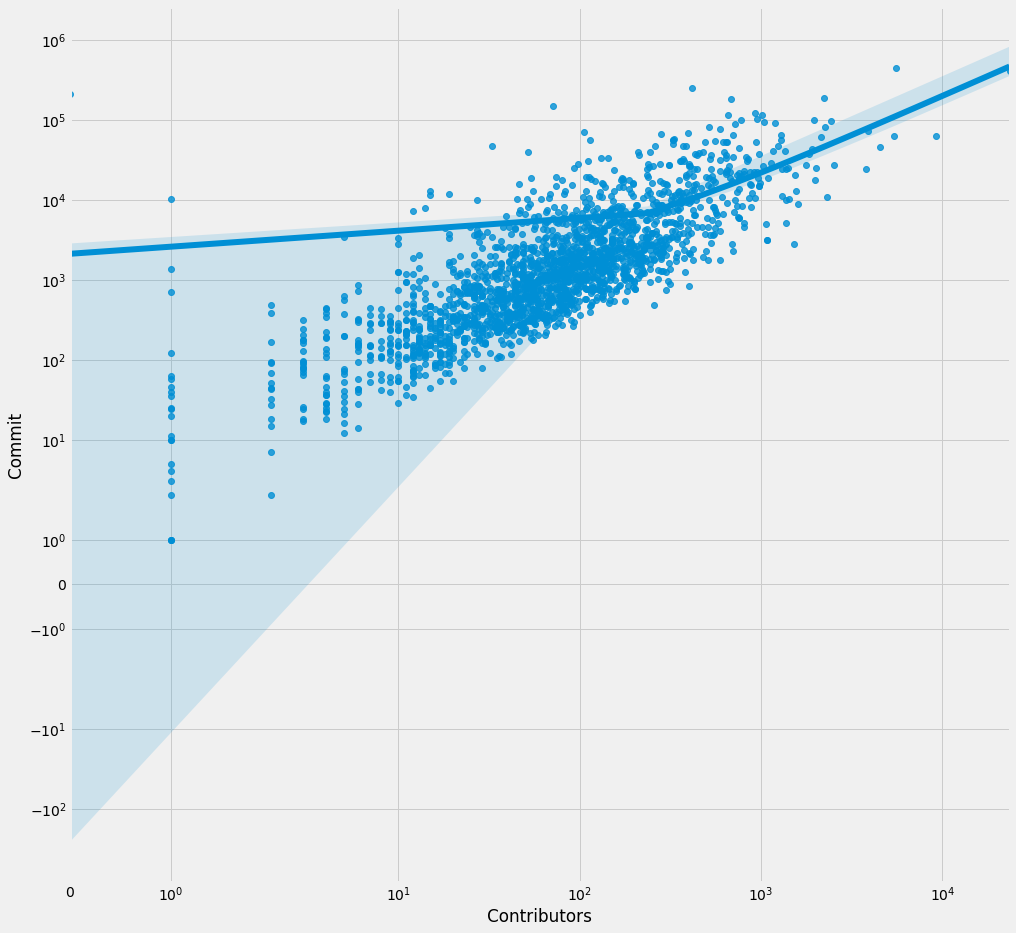

In [405]:
ax = sns.regplot(x=df_con["Contributors"], y=df_con["Commit"])
ax.set(xscale = "symlog",yscale="symlog")

[None, None]

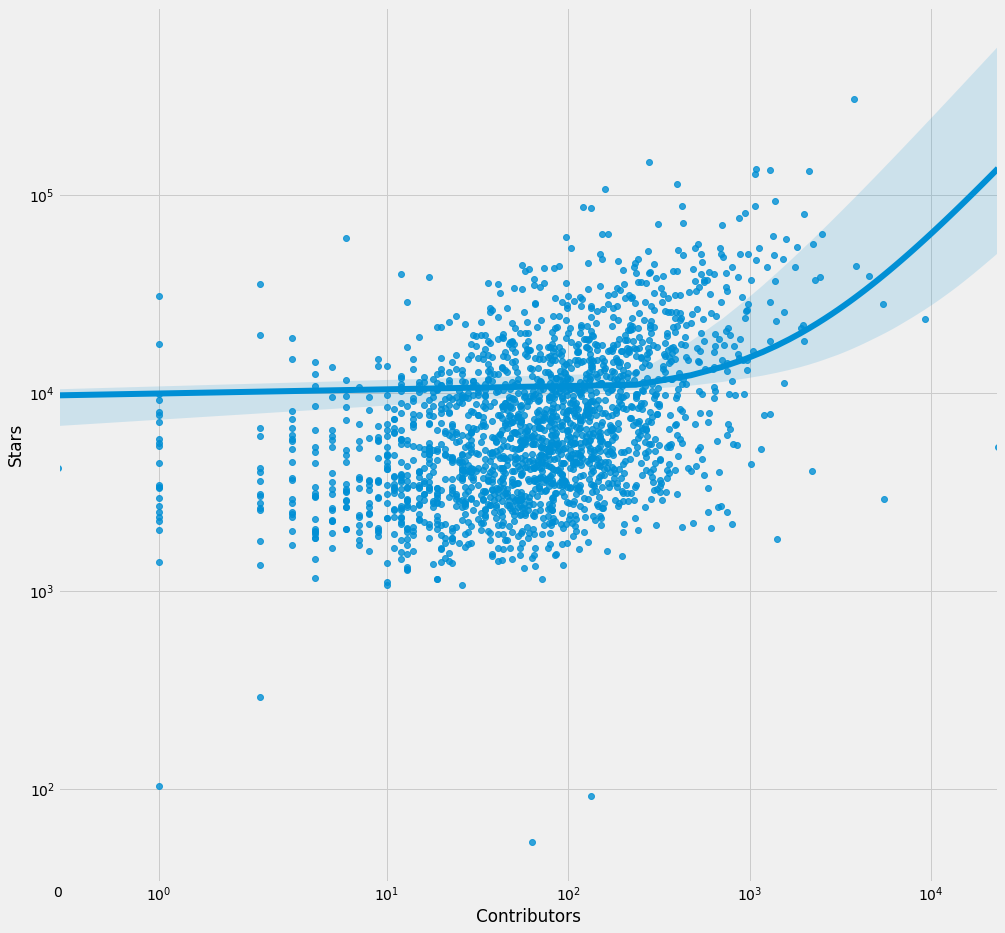

In [403]:
ax = sns.regplot(x=df_con["Contributors"], y=df_con["Stars"])
ax.set(xscale = "symlog",yscale="symlog")

In [414]:
commit_2008 = df_con[(df_con['Created_at'].str.contains("2008"))]
value_com08 = commit_2008['Commit'].sum()
commit_2009 = df_con[(df_con['Created_at'].str.contains("2009"))]
value_com09 = commit_2009['Commit'].sum()
commit_2010 = df_con[(df_con['Created_at'].str.contains("2010"))]
value_com10 = commit_2010['Commit'].sum()
commit_2011 = df_con[(df_con['Created_at'].str.contains("2011"))]
value_com11 = commit_2011['Commit'].sum()
commit_2012 = df_con[(df_con['Created_at'].str.contains("2012"))]
value_com12 = commit_2012['Commit'].sum()
commit_2013 = df_con[(df_con['Created_at'].str.contains("2013"))]
value_com13 = commit_2013['Commit'].sum()
commit_2014 = df_con[(df_con['Created_at'].str.contains("2014"))]
value_com14 = commit_2014['Commit'].sum()
commit_2015 = df_con[(df_con['Created_at'].str.contains("2015"))]
value_com15 = commit_2015['Commit'].sum()
commit_2016 = df_con[(df_con['Created_at'].str.contains("2016"))]
value_com16 = commit_2016['Commit'].sum()
dataa = [['2008', value_com08], ['2009', value_com09], ['2010', value_com10], ['2011', value_com11], ['2012', value_com12], ['2013', value_com13], ['2014', value_com14], ['2015', value_com15], ['2016', value_com16]]
# value_com09
# Create the pandas DataFrame
commit_count = pd.DataFrame(dataa, columns = ['Year', 'Total_commit'])
commit_count.head()


,Year,Total_commit
0,2008,424908.0
1,2009,1261149.0
2,2010,2228807.0
3,2011,2572326.0
4,2012,2878386.0


In [439]:
import plotly.graph_objects as go
# fig = go.Figure(data=go.Scatter(x=commit_count['Year'], y=commit_count['Total_commit']))
fig = px.line(commit_count, x='Year', y="Total_commit")

# fig.update_xlabel("Years")
# fig.update_yaxes(type="log")
fig.show()
# ax = sns.lineplot(data=commit_count, x="Year", y="Total_commit")
# ax.set(xscale = "symlog",yscale="sylog")

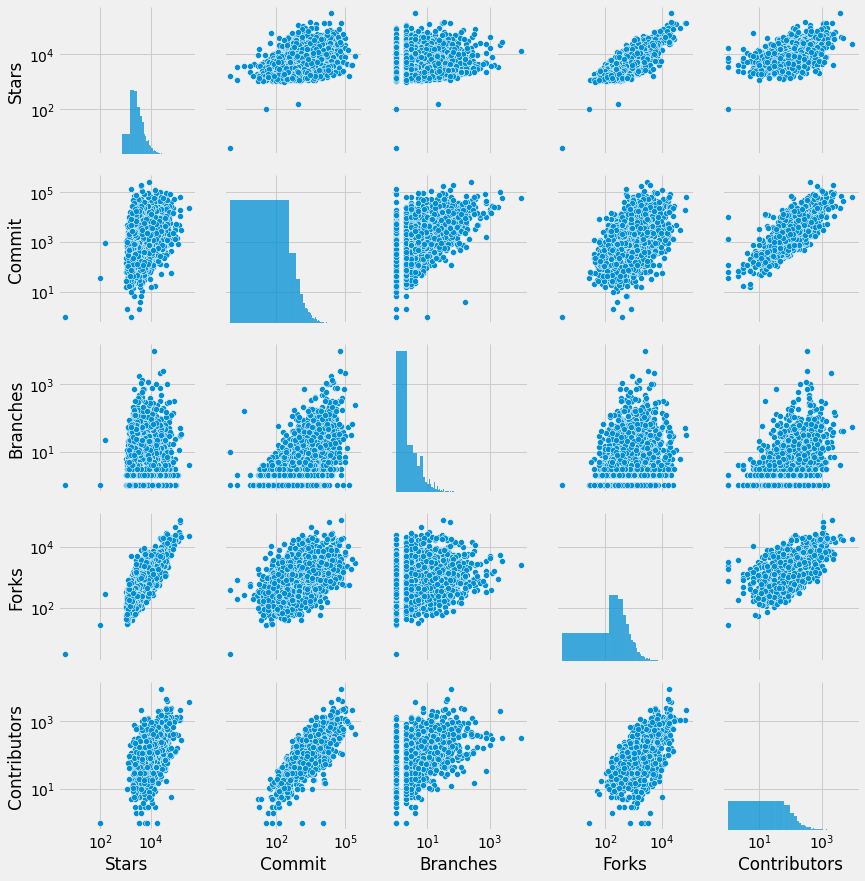

In [528]:
df_cono =df_con[["Stars", "Commit", "Branches","Forks","Contributors"]] 
g = sns.PairGrid(df_cono)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.set(xscale = "log",yscale="log")

In [478]:
# Draw a heatmap with the numeric values in each cell
# f, ax = plt.subplots(figsize=(9, 6))
# df_con1 = df_con[["Stars", "Pull", "Commit", "Branches","Forks","Contributors"]]
# sns.heatmap(df_con1, annot=True, linewidths=.5, ax=ax)
fig = px.imshow(df_con1)
fig.show()

In [671]:
# tag network

import networkx as nx

In [672]:
net_df = df_con[['Title','Created_at','Tag','Contributors' ]]
net_df.head()

,Title,Created_at,Tag,Contributors
0,FreeCodeCamp,Dec 2014,"'learn-to-code', 'nonprofits', 'programming', ...",3765.0
1,bootstrap,Jul 2011,"'css', 'bootstrap', 'javascript', 'html', 'scs...",1085.0
2,programming-books,Oct 2013,"'education', 'books', 'list', 'resource'",1066.0
3,d3,Sep 2010,'visualization',121.0
4,react,May 2013,"'javascript', 'react', 'frontend', 'declarativ...",1304.0


In [673]:
net_df.dtypes

Title            object
Created_at       object
Tag              object
Contributors    float64
dtype: object

In [674]:
# net_df[net_df['Tag'] == 'books']
# net_2008 = net_df[net_df['Created_at'].str.contains("2008")]
# net_2008



In [675]:
# net_df[net_df['Tag'].str.contains("javascript")]

In [676]:
net_df['Tag'] = net_df['Tag'].map(lambda x: x.lstrip('[').rstrip(']'))
net_df.head()

<ipython-input-676-50847d0754ca>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Created_at,Tag,Contributors
0,FreeCodeCamp,Dec 2014,"'learn-to-code', 'nonprofits', 'programming', ...",3765.0
1,bootstrap,Jul 2011,"'css', 'bootstrap', 'javascript', 'html', 'scs...",1085.0
2,programming-books,Oct 2013,"'education', 'books', 'list', 'resource'",1066.0
3,d3,Sep 2010,'visualization',121.0
4,react,May 2013,"'javascript', 'react', 'frontend', 'declarativ...",1304.0


In [677]:
net_df['Tag'].replace('', np.nan, inplace=True)
net_df.head()

C:\Users\Ihsaan\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Created_at,Tag,Contributors
0,FreeCodeCamp,Dec 2014,"'learn-to-code', 'nonprofits', 'programming', ...",3765.0
1,bootstrap,Jul 2011,"'css', 'bootstrap', 'javascript', 'html', 'scs...",1085.0
2,programming-books,Oct 2013,"'education', 'books', 'list', 'resource'",1066.0
3,d3,Sep 2010,'visualization',121.0
4,react,May 2013,"'javascript', 'react', 'frontend', 'declarativ...",1304.0


In [678]:
net_df.dropna(subset=['Tag'], inplace=True)
net_df.reset_index(drop=True, inplace=True)
net_df.head()

<ipython-input-678-42a954faf150>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Created_at,Tag,Contributors
0,FreeCodeCamp,Dec 2014,"'learn-to-code', 'nonprofits', 'programming', ...",3765.0
1,bootstrap,Jul 2011,"'css', 'bootstrap', 'javascript', 'html', 'scs...",1085.0
2,programming-books,Oct 2013,"'education', 'books', 'list', 'resource'",1066.0
3,d3,Sep 2010,'visualization',121.0
4,react,May 2013,"'javascript', 'react', 'frontend', 'declarativ...",1304.0


In [679]:
net_2016 = net_df[net_df['Created_at'].str.contains('2016')]
net_2016.head()


,Title,Created_at,Tag,Contributors
57,ansible,Apr 2016,"'python', 'ansible'",4548.0
174,riot,Jan 2016,"'javascript', 'webcomponents', 'minimal', 'fra...",NaN
181,devdocs,Jul 2016,"'devdocs', 'documentation', 'documentation-too...",103.0
190,bitcoin,Jul 2016,"'bitcoin', 'c-plus-plus', 'p2p', 'cryptocurren...",638.0
193,bulma,Feb 2016,"'css', 'html', 'flexbox', 'css-framework', 'de...",269.0


In [680]:
con_16 = net_2016.nlargest(10, 'Contributors')
con_16.reset_index(drop=True, inplace=True)
con_16.head()

,Title,Created_at,Tag,Contributors
0,ansible,Apr 2016,"'python', 'ansible'",4548.0
1,systemd,Jan 2016,"'systemd', 'c', 'linux', 'init', 'services', '...",1160.0
2,the-little-mongodb-book,Sep 2016,"'solidus', 'ruby', 'rails', 'storefront', 'eco...",672.0
3,bitcoin,Jul 2016,"'bitcoin', 'c-plus-plus', 'p2p', 'cryptocurren...",638.0
4,awesome-react-native,Jul 2016,"'react-native', 'react', 'awesome-list', 'mobile'",479.0


In [682]:
df_2016 = con_16.assign(Tag=con_16.Tag.str.split(",")).explode('Tag')
df_2016.reset_index(drop=True, inplace=True)
df_2016.shape

(57, 4)

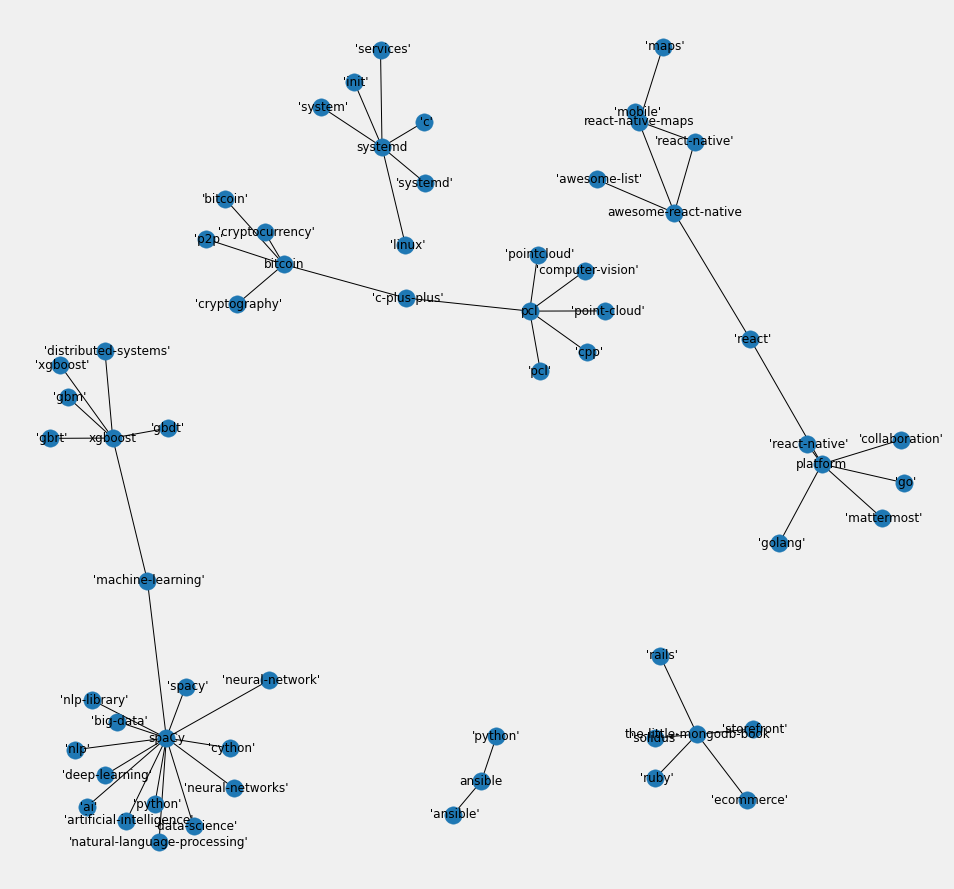

In [689]:
# Creating Graph object
g=nx.Graph() 

for i in range(0,len(df_2016)-1):
    g.add_edge(df_2016['Title'][i],df_2016['Tag'][i])


#Creating edges
# g.nodes()
# Defining the figure Size
plt.rcParams['figure.figsize']=(15,15)
plt.style.use('fivethirtyeight')


pos=nx.spring_layout(g,k=0.15, iterations=30)

# Drawing Nodes 
nx.draw_networkx_nodes(g,pos)

# Drawing Edges
nx.draw_networkx_edges(g,pos)
# paths = nx.all_shortest_paths(g, , 22)
# Drawing Labels
nx.draw_networkx_labels(g,pos)
plt.axis('off')
plt.show()

In [691]:
net_2015 = net_df[net_df['Created_at'].str.contains('2015')]
con_15 = net_2015.nlargest(10, 'Contributors')
con_15.reset_index(drop=True, inplace=True)
df_2015 = con_15.assign(Tag=con_15.Tag.str.split(",")).explode('Tag')
df_2015.reset_index(drop=True, inplace=True)
df_2015.shape

(47, 4)

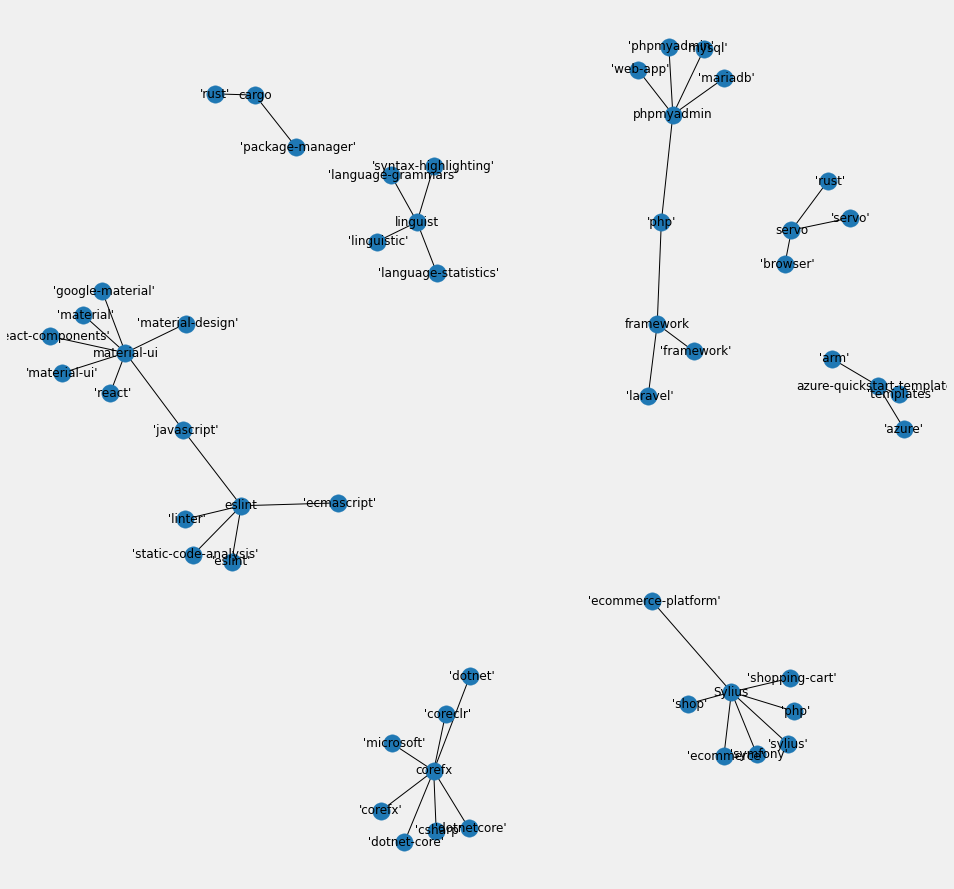

In [693]:
# Creating Graph object
g=nx.Graph() 

for i in range(0,len(df_2015)-1):
    g.add_edge(df_2015['Title'][i],df_2015['Tag'][i])


#Creating edges
# g.nodes()
# Defining the figure Size
plt.rcParams['figure.figsize']=(15,15)
plt.style.use('fivethirtyeight')


pos=nx.spring_layout(g,k=0.15, iterations=30)

# Drawing Nodes 
nx.draw_networkx_nodes(g,pos)

# Drawing Edges
nx.draw_networkx_edges(g,pos)
# paths = nx.all_shortest_paths(g, , 22)
# Drawing Labels
nx.draw_networkx_labels(g,pos)
plt.axis('off')
plt.show()

In [694]:
net_2014 = net_df[net_df['Created_at'].str.contains('2014')]
con_14 = net_2014.nlargest(10, 'Contributors')
con_14.reset_index(drop=True, inplace=True)
df_2014 = con_14.assign(Tag=con_14.Tag.str.split(",")).explode('Tag')
df_2014.reset_index(drop=True, inplace=True)
df_2014.shape

(55, 4)

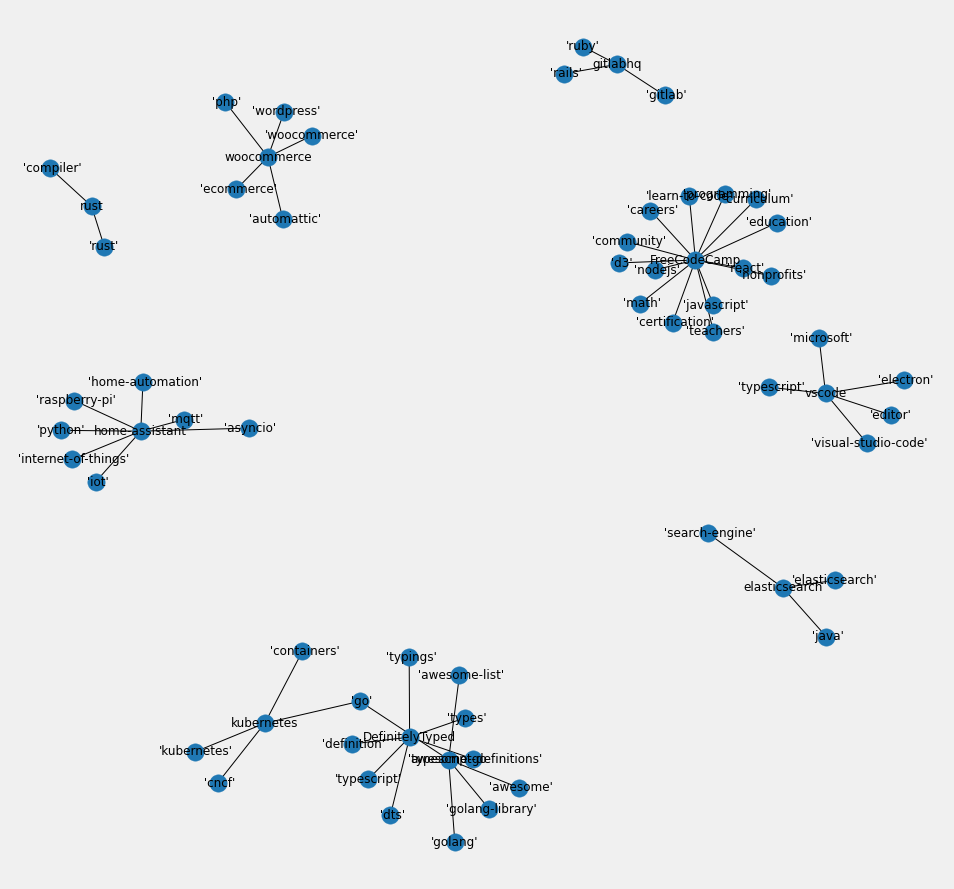

In [695]:
# Creating Graph object
g=nx.Graph() 

for i in range(0,len(df_2014)-1):
    g.add_edge(df_2014['Title'][i],df_2014['Tag'][i])


#Creating edges
# g.nodes()
# Defining the figure Size
plt.rcParams['figure.figsize']=(15,15)
plt.style.use('fivethirtyeight')


pos=nx.spring_layout(g,k=0.15, iterations=30)

# Drawing Nodes 
nx.draw_networkx_nodes(g,pos)

# Drawing Edges
nx.draw_networkx_edges(g,pos)
# paths = nx.all_shortest_paths(g, , 22)
# Drawing Labels
nx.draw_networkx_labels(g,pos)
plt.axis('off')
plt.show()

In [696]:
net_2013 = net_df[net_df['Created_at'].str.contains('2013')]
con_13 = net_2013.nlargest(10, 'Contributors')
con_13.reset_index(drop=True, inplace=True)
df_2013 = con_13.assign(Tag=con_13.Tag.str.split(",")).explode('Tag')
df_2013.reset_index(drop=True, inplace=True)
df_2013.shape

(69, 4)

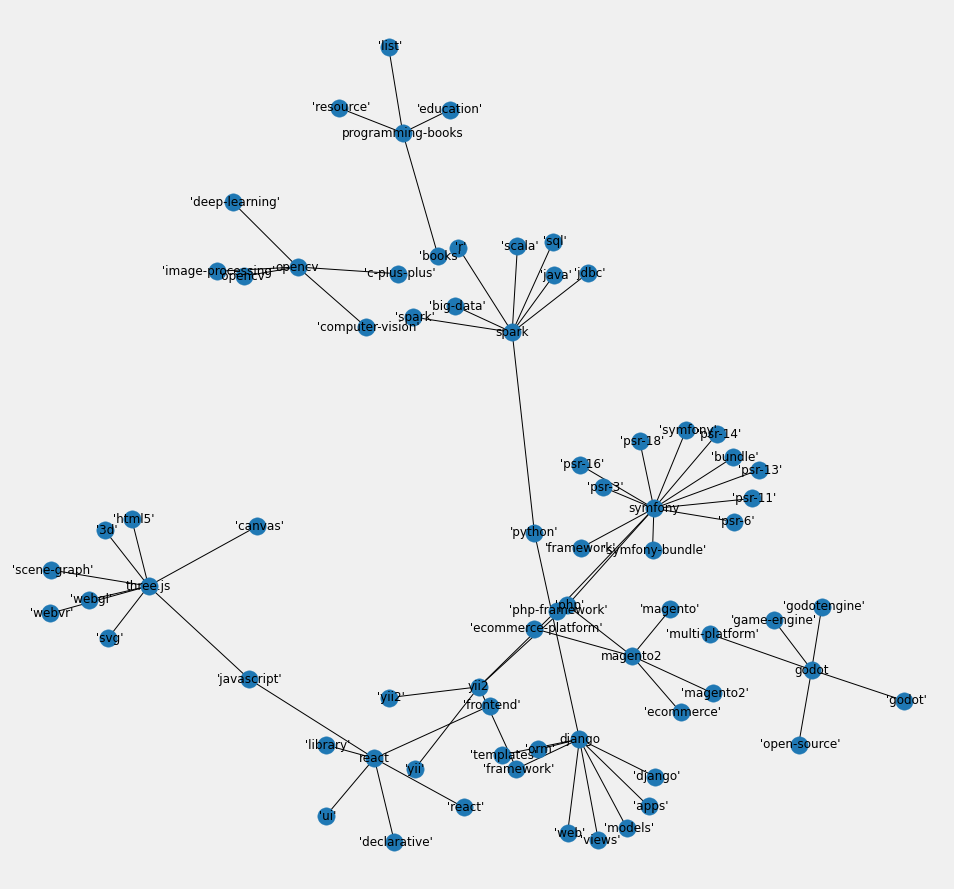

In [698]:
# Creating Graph object
g=nx.Graph() 

for i in range(0,len(df_2013)-1):
    g.add_edge(df_2013['Title'][i],df_2013['Tag'][i])


#Creating edges
# g.nodes()
# Defining the figure Size
plt.rcParams['figure.figsize']=(15,15)
plt.style.use('fivethirtyeight')


pos=nx.spring_layout(g,k=0.15, iterations=30)

# Drawing Nodes 
nx.draw_networkx_nodes(g,pos)

# Drawing Edges
nx.draw_networkx_edges(g,pos)
# paths = nx.all_shortest_paths(g, , 22)
# Drawing Labels
nx.draw_networkx_labels(g,pos)
plt.axis('off')
plt.show()

In [699]:
net_2012 = net_df[net_df['Created_at'].str.contains('2012')]
con_12 = net_2012.nlargest(10, 'Contributors')
con_12.reset_index(drop=True, inplace=True)
df_2012 = con_12.assign(Tag=con_12.Tag.str.split(",")).explode('Tag')
df_2012.reset_index(drop=True, inplace=True)
df_2012.shape

(61, 4)

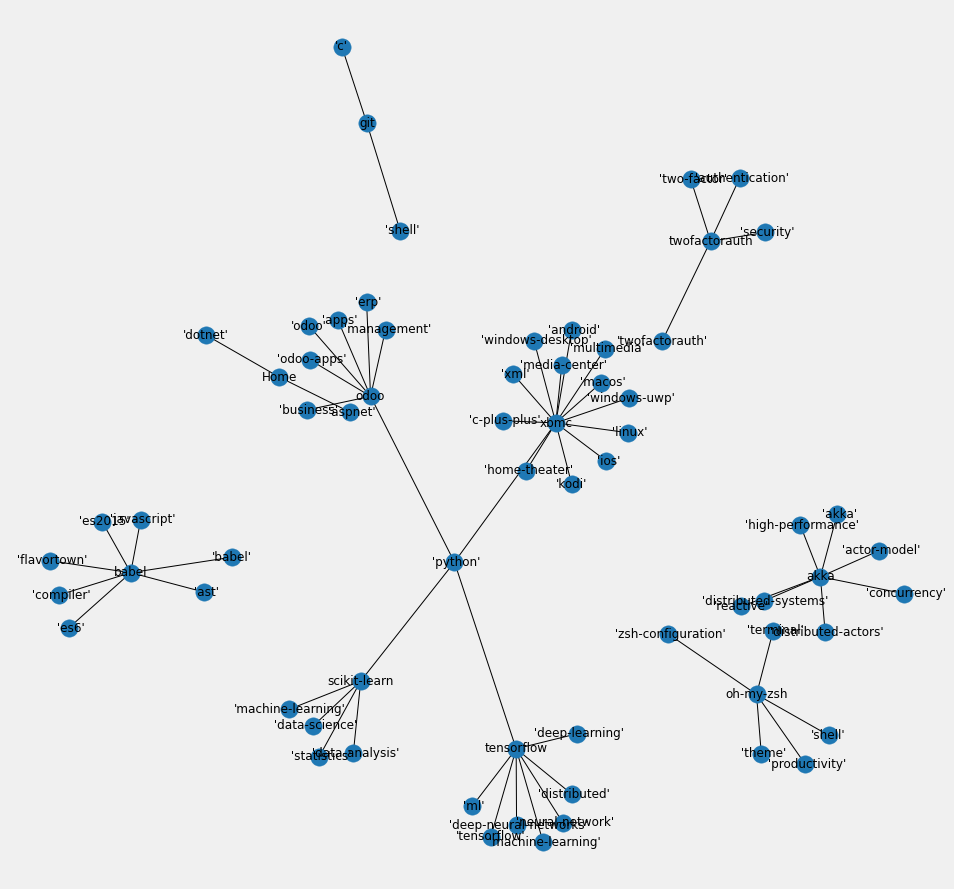

In [701]:
# Creating Graph object
g=nx.Graph() 

for i in range(0,len(df_2012)-1):
    g.add_edge(df_2012['Title'][i],df_2012['Tag'][i])


#Creating edges
# g.nodes()
# Defining the figure Size
plt.rcParams['figure.figsize']=(15,15)
plt.style.use('fivethirtyeight')


pos=nx.spring_layout(g,k=0.15, iterations=30)

# Drawing Nodes 
nx.draw_networkx_nodes(g,pos)

# Drawing Edges
nx.draw_networkx_edges(g,pos)
# paths = nx.all_shortest_paths(g, , 22)
# Drawing Labels
nx.draw_networkx_labels(g,pos)
plt.axis('off')
plt.show()

In [192]:
net_2011 = net_df[net_df['Created_at'].str.contains('2011|2012')]
net_2011.head()


,Title,Created_at,Tag
1,bootstrap,Jul 2011,"'css', 'bootstrap', 'javascript', 'html', 'scs..."
5,Font-Awesome,Feb 2012,"'fontawesome', 'icons', 'webfont', 'font', 'cs..."
7,oh-my-zsh,Nov 2012,"'shell', 'zsh-configuration', 'theme', 'termin..."
10,gitignore,Sep 2011,"'gitignore', 'git'"
14,meteor,Jan 2012,"'javascript', 'meteor', 'mongodb', 'build-syst..."


In [530]:
df_2011 = net_2011.assign(Tag=net_2011.Tag.str.split(",")).explode('Tag')
df_2011.reset_index(drop=True, inplace=True)
df_2011.head()

(5018, 3)

In [ ]:
# Creating Graph object
g=nx.Graph() 

for i in range(0,len(df_2011)-1):
    g.add_edge(df_2011['Title'][i],df_2011['Tag'][i])


#Creating edges


# Defining the figure Size
plt.rcParams['figure.figsize']=(15,15)
plt.style.use('fivethirtyeight')


pos=nx.spring_layout(g)

# Drawing Nodes 
nx.draw_networkx_nodes(g,pos)

# Drawing Edges
nx.draw_networkx_edges(g,pos)

# Drawing Labels
nx.draw_networkx_labels(g,pos)
plt.axis('off')
plt.show()

In [59]:
df_explode = net_df.assign(Tag=net_df.Tag.str.split(",")).explode('Tag')
df_explode.reset_index(drop=True, inplace=True)
df_explode.head(60)


In [60]:
df_explode.to_csv('nodes_and_edges.csv')

In [35]:
# (df_explode['names'].apply(lambda x: pd.Series(x))
#    ....:         .stack()
#    ....:         .reset_index(level=1, drop=True)
#    ....:         .to_frame('names')
#    ....:         .join(df_explode[['Title']], how='left')
#    ....: )
length = len(df_explode)
# print(df_explode['Title'][18952] + df_explode['Tag'][18952])
length

18953

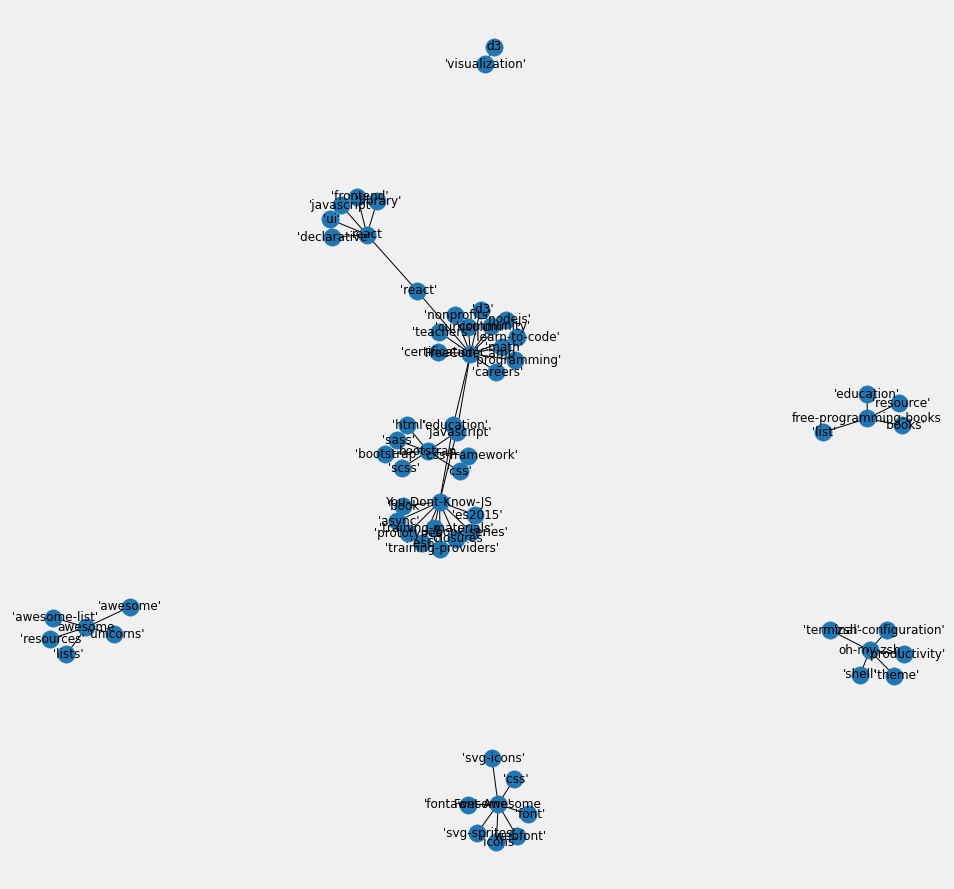

In [645]:
# Creating Graph object
g=nx.Graph() 

for i in range(0,60):
    g.add_edge(df_explode['Title'][i],df_explode['Tag'][i])


#Creating edges

# Defining the figure Size
plt.rcParams['figure.figsize']=(15,15)
plt.style.use('fivethirtyeight')


pos=nx.spring_layout(g)

# Drawing Nodes 
nx.draw_networkx_nodes(g,pos)

# Drawing Edges
nx.draw_networkx_edges(g,pos)

# Drawing Labels
nx.draw_networkx_labels(g,pos)
plt.axis('off')
plt.show()

In [ ]:
#network of the popular tags that people contributed to

In [626]:
df_con['Tag'] = df_con['Tag'].map(lambda x: x.lstrip('[').rstrip(']'))
df_con['Tag'].replace('', np.nan, inplace=True)
df_con.dropna(subset=['Tag'], inplace=True)
df_con.reset_index(drop=True, inplace=True)
con_10 = df_con.nlargest(10, 'Contributors')
con_10.reset_index(drop=True, inplace=True)
con_10.head()

,Title,Description,Created_at,Stars,Pull,Issues,Commit,Branches,Forks,Contributors,Tag,License,Link,Repo_match,Address
0,DefinitelyTyped,The repository for high quality TypeScript ty...,Oct 2014,23619,132,2848,63888.0,56.0,18434,9234.0,"'typescript', 'definition', 'dts', 'types', 't...",View license,https://github.com/DefinitelyTyped/DefinitelyT...,DefinitelyTyped,DefinitelyTyped/DefinitelyTyped
1,ansible,Ansible is a radically simple IT automation p...,Apr 2016,38789,2034,3993,46333.0,41.0,16334,4548.0,"'python', 'ansible'",GPL-3.0,https://github.com/ansible/ansible,ansible,ansible/ansible
2,rails,Ruby on Rails,May 2009,43803,760,339,74186.0,40.0,17671,3862.0,"'rails', 'mvc', 'html', 'activerecord', 'activ...",MIT,https://github.com/rails/rails,rails,rails/rails
3,FreeCodeCamp,The https://www.freeCodeCamp.org open source ...,Dec 2014,304238,789,189,24132.0,4.0,22380,3765.0,"'learn-to-code', 'nonprofits', 'programming', ...",BSD-3-Clause,https://github.com/FreeCodeCamp/FreeCodeCamp,FreeCodeCamp,FreeCodeCamp/FreeCodeCamp
4,node,Node.js JavaScript runtime ✨🐢🚀✨,Dec 2010,63405,309,764,27850.0,124.0,14503,2513.0,"'nodejs', 'javascript', 'node', 'js', 'runtime...",View license,https://github.com/nodejs/node,nodejsnode,nodejs/node


In [628]:
con_10.drop(con_10.index[con_10['Title'] == 'rails'], inplace = True)
con_10.drop(con_10.index[con_10['Title'] == 'rails'], inplace = True)

con_10.head()

,Title,Description,Created_at,Stars,Pull,Issues,Commit,Branches,Forks,Contributors,Tag,License,Link,Repo_match,Address
0,DefinitelyTyped,The repository for high quality TypeScript ty...,Oct 2014,23619,132,2848,63888.0,56.0,18434,9234.0,"'typescript', 'definition', 'dts', 'types', 't...",View license,https://github.com/DefinitelyTyped/DefinitelyT...,DefinitelyTyped,DefinitelyTyped/DefinitelyTyped
1,ansible,Ansible is a radically simple IT automation p...,Apr 2016,38789,2034,3993,46333.0,41.0,16334,4548.0,"'python', 'ansible'",GPL-3.0,https://github.com/ansible/ansible,ansible,ansible/ansible
3,FreeCodeCamp,The https://www.freeCodeCamp.org open source ...,Dec 2014,304238,789,189,24132.0,4.0,22380,3765.0,"'learn-to-code', 'nonprofits', 'programming', ...",BSD-3-Clause,https://github.com/FreeCodeCamp/FreeCodeCamp,FreeCodeCamp,FreeCodeCamp/FreeCodeCamp
4,node,Node.js JavaScript runtime ✨🐢🚀✨,Dec 2010,63405,309,764,27850.0,124.0,14503,2513.0,"'nodejs', 'javascript', 'node', 'js', 'runtime...",View license,https://github.com/nodejs/node,nodejsnode,nodejs/node
5,rust,Empowering everyone to build reliable and eff...,Nov 2014,38288,164,4971,97416.0,7.0,5963,2443.0,"'rust', 'compiler'",View license,https://github.com/rust-lang/rust,rust_langrust,rust-lang/rust


In [629]:
df_con_10 = con_10.assign(Tag=con_10.Tag.str.split(",")).explode('Tag')
df_con_10.reset_index(drop=True, inplace=True)
df_con_10.head(60)

,Title,Description,Created_at,Stars,Pull,Issues,Commit,Branches,Forks,Contributors,Tag,License,Link,Repo_match,Address
0,DefinitelyTyped,The repository for high quality TypeScript ty...,Oct 2014,23619,132,2848,63888.0,56.0,18434,9234.0,'typescript',View license,https://github.com/DefinitelyTyped/DefinitelyT...,DefinitelyTyped,DefinitelyTyped/DefinitelyTyped
1,DefinitelyTyped,The repository for high quality TypeScript ty...,Oct 2014,23619,132,2848,63888.0,56.0,18434,9234.0,'definition',View license,https://github.com/DefinitelyTyped/DefinitelyT...,DefinitelyTyped,DefinitelyTyped/DefinitelyTyped
2,DefinitelyTyped,The repository for high quality TypeScript ty...,Oct 2014,23619,132,2848,63888.0,56.0,18434,9234.0,'dts',View license,https://github.com/DefinitelyTyped/DefinitelyT...,DefinitelyTyped,DefinitelyTyped/DefinitelyTyped
3,DefinitelyTyped,The repository for high quality TypeScript ty...,Oct 2014,23619,132,2848,63888.0,56.0,18434,9234.0,'types',View license,https://github.com/DefinitelyTyped/DefinitelyT...,DefinitelyTyped,DefinitelyTyped/DefinitelyTyped
4,DefinitelyTyped,The repository for high quality TypeScript ty...,Oct 2014,23619,132,2848,63888.0,56.0,18434,9234.0,'typings',View license,https://github.com/DefinitelyTyped/DefinitelyT...,DefinitelyTyped,DefinitelyTyped/DefinitelyTyped
5,DefinitelyTyped,The repository for high quality TypeScript ty...,Oct 2014,23619,132,2848,63888.0,56.0,18434,9234.0,'typescript-definitions',View license,https://github.com/DefinitelyTyped/DefinitelyT...,DefinitelyTyped,DefinitelyTyped/DefinitelyTyped
6,ansible,Ansible is a radically simple IT automation p...,Apr 2016,38789,2034,3993,46333.0,41.0,16334,4548.0,'python',GPL-3.0,https://github.com/ansible/ansible,ansible,ansible/ansible
7,ansible,Ansible is a radically simple IT automation p...,Apr 2016,38789,2034,3993,46333.0,41.0,16334,4548.0,'ansible',GPL-3.0,https://github.com/ansible/ansible,ansible,ansible/ansible
8,FreeCodeCamp,The https://www.freeCodeCamp.org open source ...,Dec 2014,304238,789,189,24132.0,4.0,22380,3765.0,'learn-to-code',BSD-3-Clause,https://github.com/FreeCodeCamp/FreeCodeCamp,FreeCodeCamp,FreeCodeCamp/FreeCodeCamp
9,FreeCodeCamp,The https://www.freeCodeCamp.org open source ...,Dec 2014,304238,789,189,24132.0,4.0,22380,3765.0,'nonprofits',BSD-3-Clause,https://github.com/FreeCodeCamp/FreeCodeCamp,FreeCodeCamp,FreeCodeCamp/FreeCodeCamp


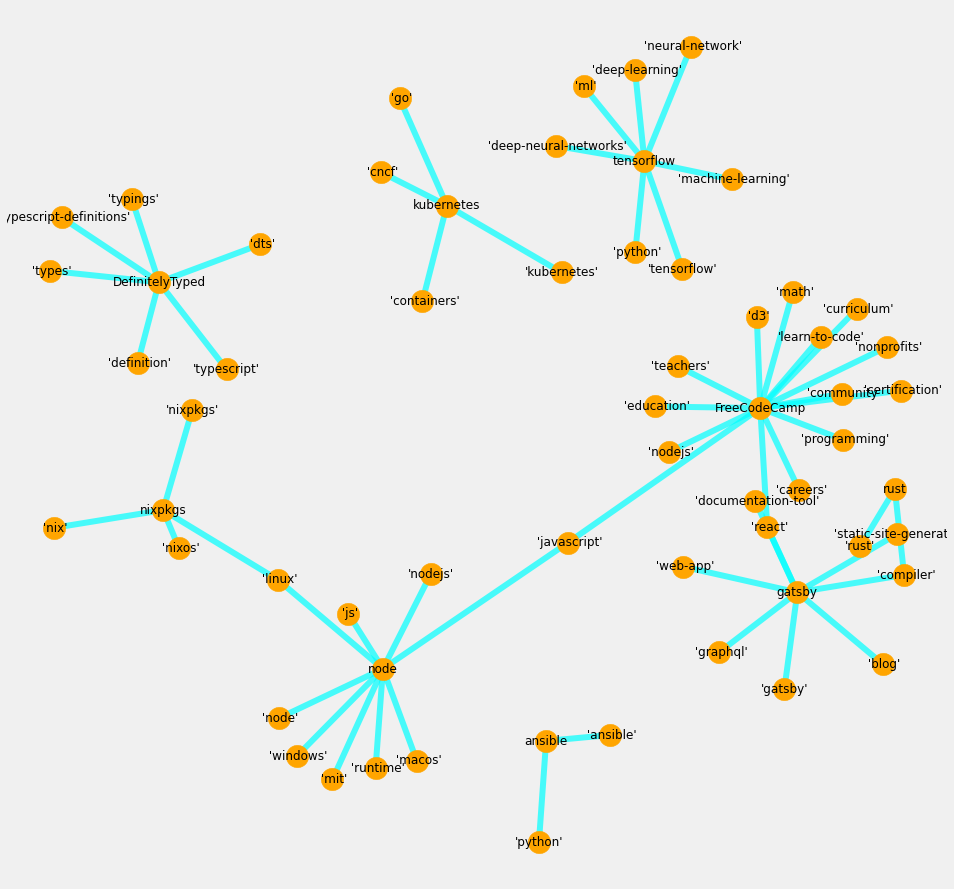

In [631]:
# Creating Graph object
g=nx.Graph() 

for i in range(0,len(df_con_10)-1):
    g.add_edge(df_con_10['Title'][i],df_con_10['Tag'][i])


#Creating edges
# g.nodes()
# Defining the figure Size
plt.rcParams['figure.figsize']=(15,15)
plt.style.use('fivethirtyeight')


pos=nx.spring_layout(g,k=0.15, iterations=20)

nx.draw_networkx_nodes(g,pos,node_size=500,node_color='Orange')

# Drawing Edges
nx.draw_networkx_edges(g,pos,width=6,alpha=0.7,edge_color='aqua')

# Drawing Labels
nx.draw_networkx_labels(g,pos)
plt.axis('off')
plt.show()